In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/yield_df.csv',index_col=0)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


Null Check

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(25932, 7)

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


# EDA

In [ ]:
df['Area'].value_counts()

,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966
...,...
Estonia,42
Belgium,39
Bahrain,29


# Value counts per country

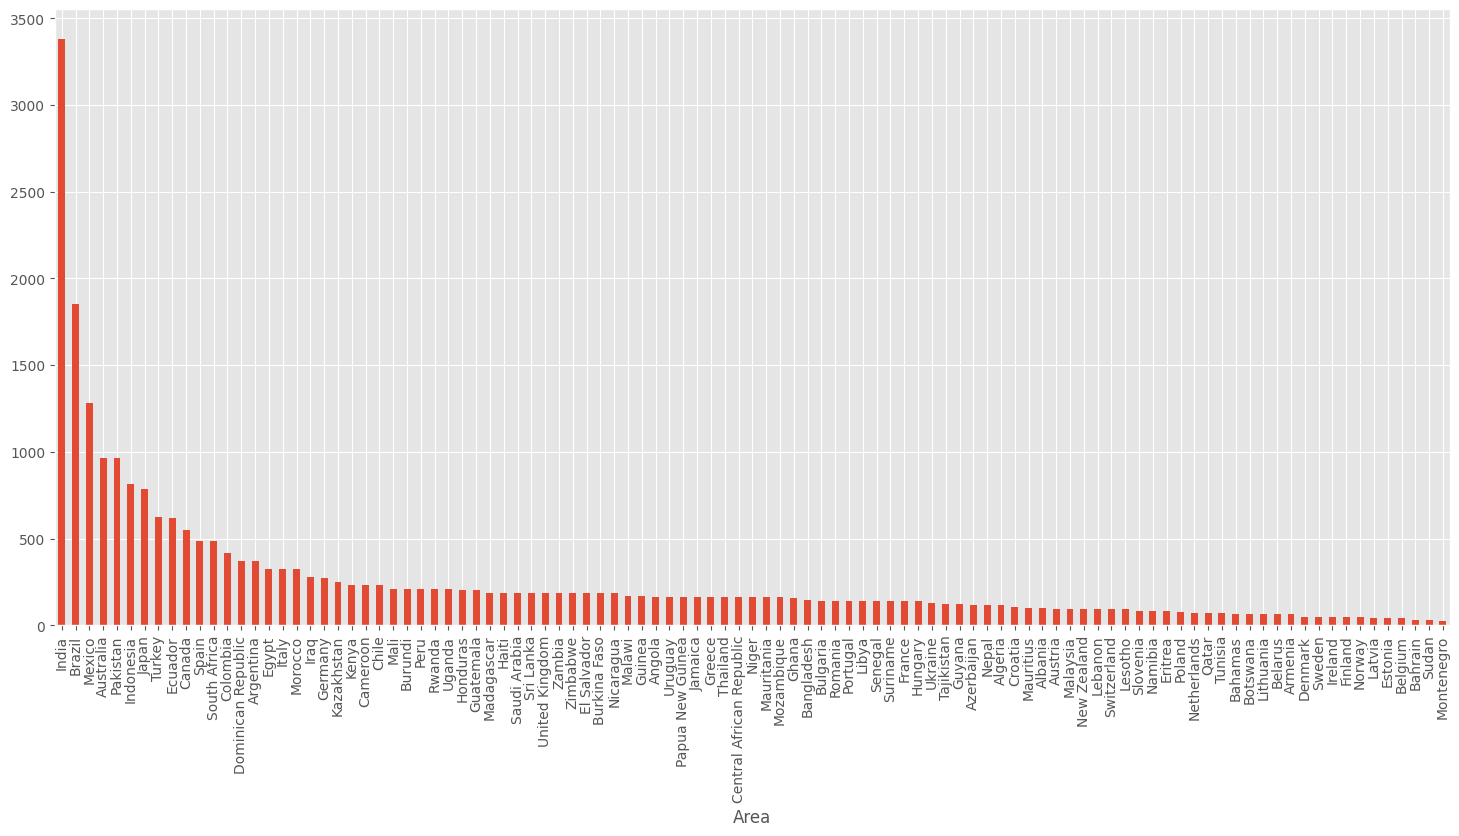

In [ ]:
plt.figure(figsize=(18,8))
df['Area'].value_counts().plot.bar()
plt.show()

# yield per country

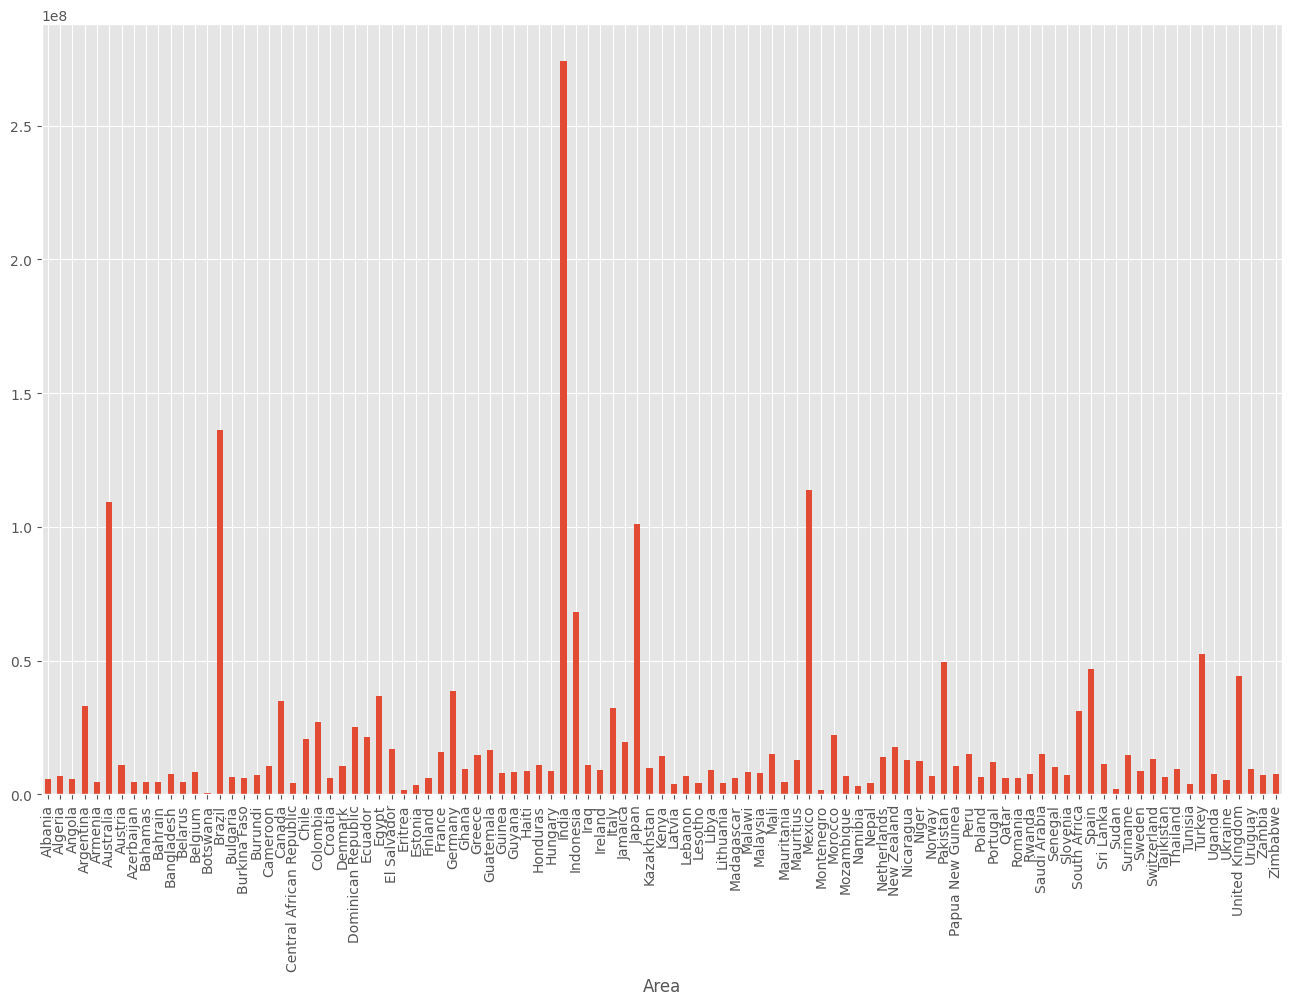

In [ ]:
plt.figure(figsize=(16,10))
df.groupby('Area')['hg/ha_yield'].sum().plot.bar()
plt.show()

# Value counts per Item

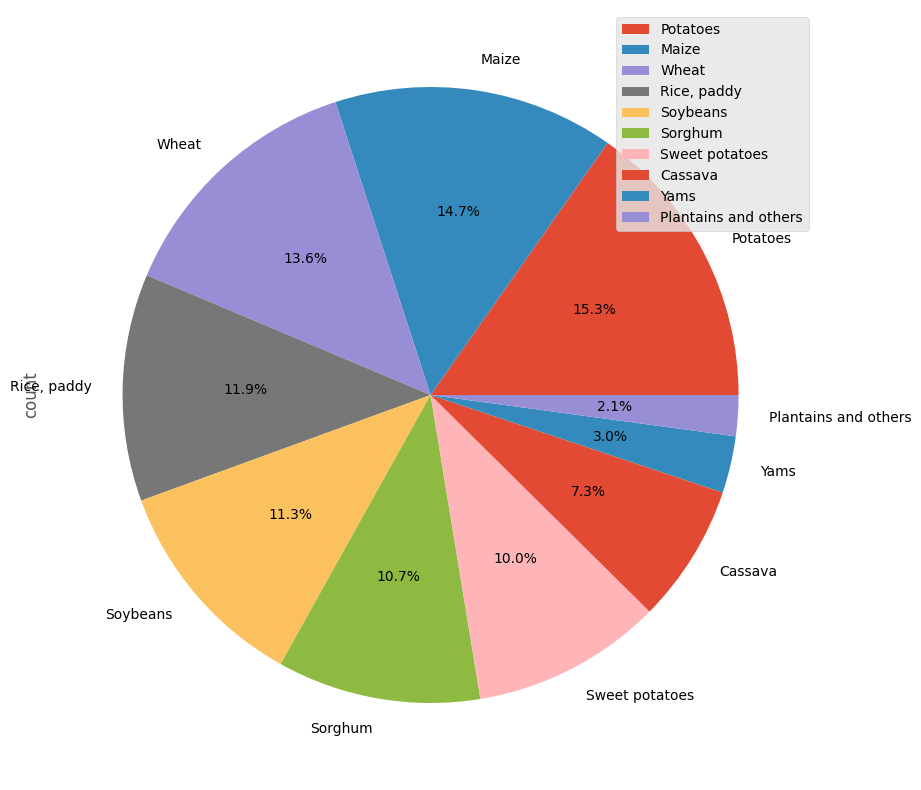

In [ ]:
plt.figure(figsize=(10,10))
df['Item'].value_counts().plot.pie(autopct='%1.1f%%',legend=True)
plt.show()

# Yield per Item (crop)

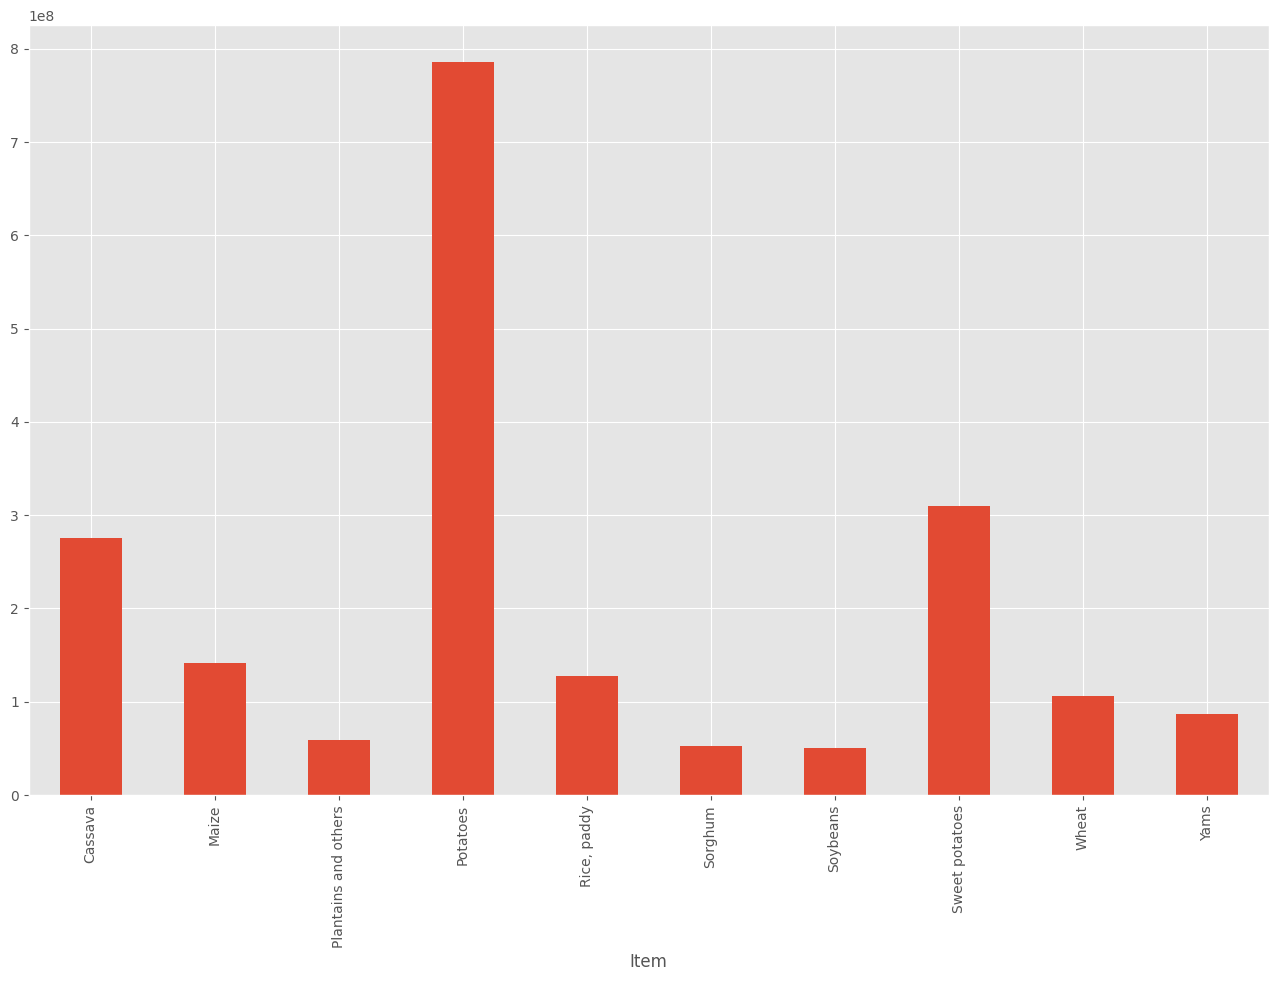

In [ ]:
plt.figure(figsize=(16,10))
df.groupby('Item')['hg/ha_yield'].sum().plot.bar()
plt.show()

In [ ]:
df.groupby(['Area','Item'], sort=True)['hg/ha_yield'].sum().nlargest(10)


Area            Item          
India           Cassava           119691113
                Potatoes           77126500
Australia       Potatoes           45670386
Brazil          Potatoes           40335293
United Kingdom  Potatoes           37364116
India           Sweet potatoes     37169811
Mexico          Potatoes           36559587
Australia       Sweet potatoes     35550294
Japan           Potatoes           34829648
Mexico          Sweet potatoes     31148282
Name: hg/ha_yield, dtype: int64

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# Correlation

<Axes: >

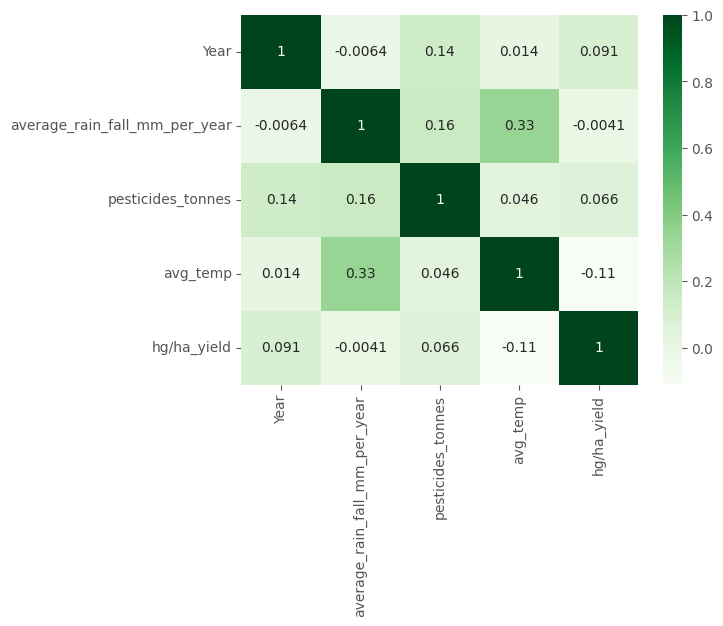

In [ ]:
matrix = df[['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'hg/ha_yield']].corr()

# correlation matrix
sns.heatmap(matrix, cmap='Greens', annot=True)

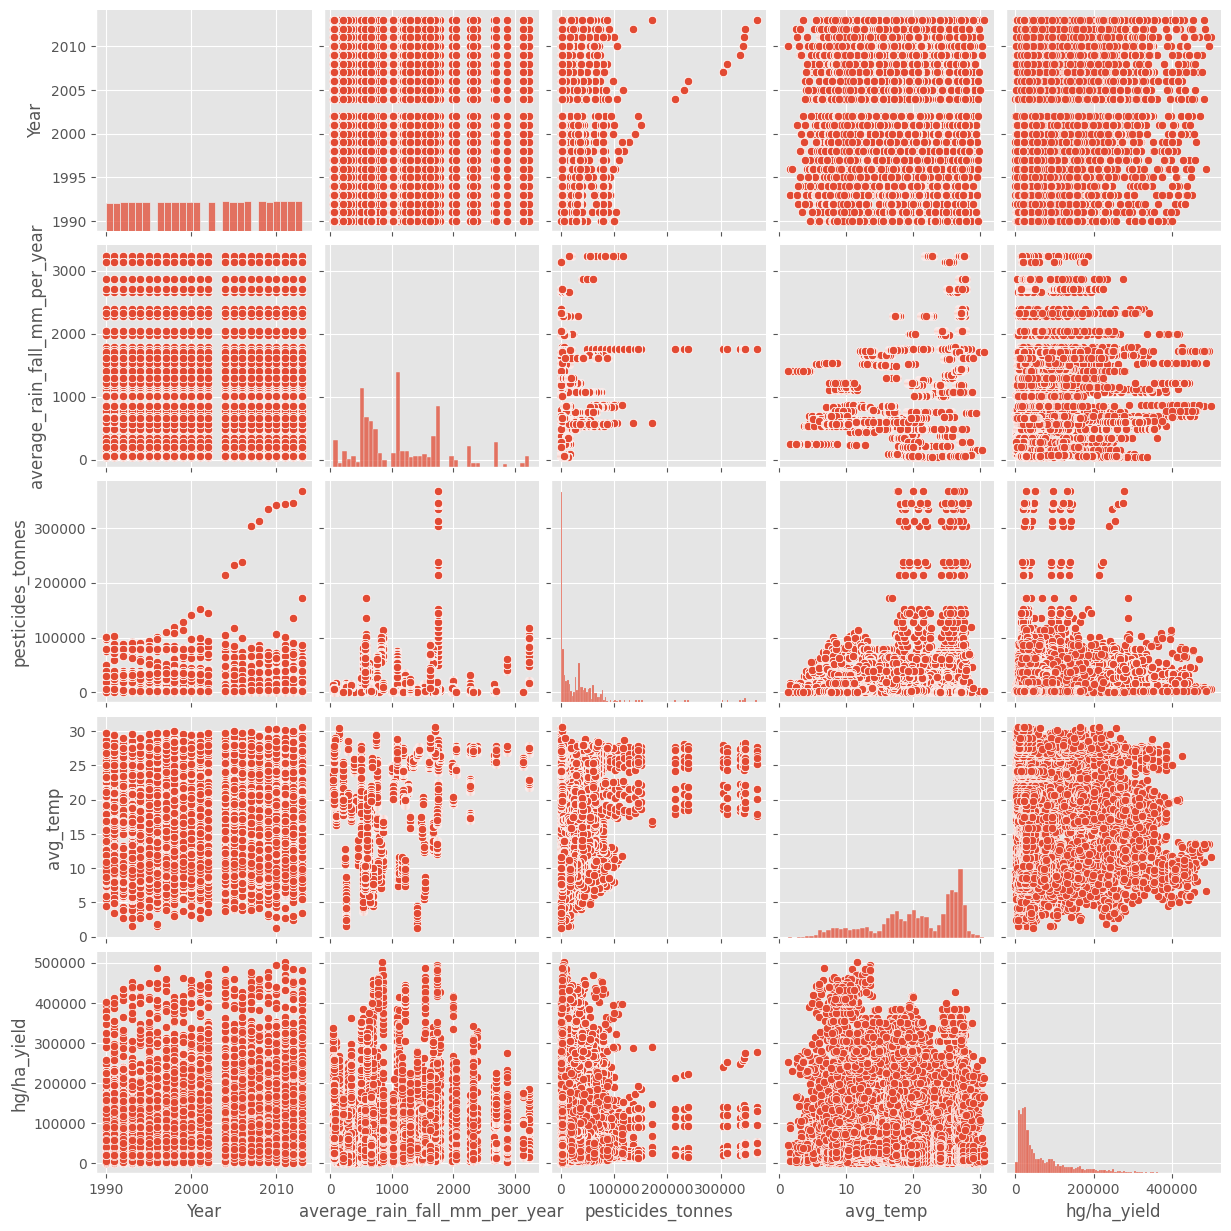

In [ ]:
sns.pairplot(df[['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'hg/ha_yield']])

In [ ]:
X = df[['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item']]
y = df['hg/ha_yield']

In [ ]:
X.shape

(25932, 6)

In [ ]:
y.shape

(25932,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle = True)

In [ ]:
X_train.shape

(20745, 6)

In [ ]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
17096,2012,1668.0,54716.40,13.11,Japan,Wheat
723,2012,591.0,136185.08,18.18,Argentina,Soybeans
7132,1992,1410.0,4971.00,26.45,Dominican Republic,Sorghum
8552,2009,1784.0,3333.88,26.21,El Salvador,Sweet potatoes
9740,1998,1651.0,181.35,27.63,Guinea,"Rice, paddy"
...,...,...,...,...,...,...
23168,1992,3142.0,121.00,25.30,Papua New Guinea,"Rice, paddy"
10444,2004,589.0,9940.50,10.37,Hungary,"Rice, paddy"
27747,1994,1300.0,2272.08,17.17,Uruguay,Wheat
22842,2009,494.0,3957.61,26.68,Pakistan,Maize


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ],
    remainder = 'passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.fit_transform(X_test)

#  Baseline Models

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")


Linear Regression: mae : 29897.28805252291 score : 0.7472732661395576


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: mae : 29883.830652070385 score : 0.7472938374682895
Ridge: mae : 29852.960374434308 score : 0.747262666435168
Decision Tree: mae : 5543.717948717948 score : 0.9672676942071035
KNN: mae : 4679.874725274726 score : 0.9846231501994461


# Prediction

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [ ]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
result

36613.0

In [ ]:
import pickle
pickle.dump(dtr, open("dtr.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))